## Pima Indians Diabetes Database

Previsão do início de diabetes dos índios Pima com base em medidas de diagnóstico

Permite importar primeiro as bibliotecas necessárias:

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt

from sklearn import preprocessing

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

### Sobre o dataset

Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. O objetivo do dataset é prever de forma diagnóstica se um paciente tem ou não diabetes, com base em certas medidas de diagnóstico incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de idade, descendentes dos índios Pima.

O conjunto de dados consiste em várias variáveis preditivas médicas e uma variável alvo, "Outcome". As variáveis preditoras incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade e assim por diante.


### Ler dados do arquivo CSV  

In [2]:
diabetes_df = pd.read_csv("diabetes.csv")

# mostra as 10 primeiras linhas do dataframe
diabetes_df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# encontra o nome das colunas do dataframe
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h2>Tipos de dados</h2>

Os principais tipos armazenados nos quadros de dados do Pandas são <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> e <b>datetime64</b>. Para aprender melhor sobre cada atributo, é sempre bom conhecer o tipo de dados de cada coluna. No pandas:

In [4]:
# os tipos de dados de cada coluna
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<h2>Descrição estatística dos dados</h2>
Se quisermos obter um resumo estatístico de cada coluna, como contagem, valor médio da coluna, desvio padrão da coluna, etc. Utilizamos o método de descrição:

In [5]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Descrição estatística de colunas selecionadas
diabetes_df[['Pregnancies','Glucose','Age']].describe()

,Pregnancies,Glucose,Age
count,768.000000,768.000000,768.000000
mean,3.845052,120.894531,33.240885
std,3.369578,31.972618,11.760232
min,0.000000,0.000000,21.000000
25%,1.000000,99.000000,24.000000
50%,3.000000,117.000000,29.000000
75%,6.000000,140.250000,41.000000
max,17.000000,199.000000,81.000000


In [7]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Vamos ver os valores das variáveis, limitados a no máximo 20 valores.

In [8]:
for var in diabetes_df.columns:
    print(var, diabetes_df[var].unique()[0:20], '\n')

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14] 

Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126] 

BloodPressure [72 66 64 40 74 50  0 70 96 92 80 60 84 30 88 90 94 76 82 75] 

SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25] 

Insulin [  0  94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192
 207  70] 

BMI [33.6 26.6 23.3 28.1 43.1 25.6 31.  35.3 30.5  0.  37.6 38.  27.1 30.1
 25.8 30.  45.8 29.6 43.3 34.6] 

DiabetesPedigreeFunction [0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529] 

Age [50 31 32 21 33 30 26 29 53 54 34 57 59 51 27 41 43 22 38 60] 

Outcome [1 0] 



Não encontramos valores ausentes num primeiro momento, mas vamos continuar a análise

<h2>Identificando valores ausentes</h2>

No conjunto de dados do carro, os dados ausentes vêm com o ponto de interrogação "?". Nós substituímos "?" com NaN (Not a Number), que é o marcador de valor ausente padrão do Python, por razões de velocidade e conveniência computacional. Aqui usamos a função:
 <pre>.replace(A, B, inplace = True) </pre>
para substituir A por B


EXISTEM VALORES AUSENTES?

In [9]:
diabetes_df.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [10]:
missing_data = diabetes_df.isnull()
missing_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


<h4>Contar valores ausentes em cada coluna</h4>
<p>
    Usando um loop <b>for</b> no Python, podemos descobrir rapidamente o número de valores ausentes em cada coluna. "True" representa um valor ausente, "False" significa que o valor está presente no conjunto de dados. No corpo do loop <b>for</b>, o método ".value_counts()" conta o número de valores "True".
</p>

In [11]:
for i in missing_data.columns:
    print (missing_data[i].value_counts())
    print("")    

False    768
Name: Pregnancies, dtype: int64

False    768
Name: Glucose, dtype: int64

False    768
Name: BloodPressure, dtype: int64

False    768
Name: SkinThickness, dtype: int64

False    768
Name: Insulin, dtype: int64

False    768
Name: BMI, dtype: int64

False    768
Name: DiabetesPedigreeFunction, dtype: int64

False    768
Name: Age, dtype: int64

False    768
Name: Outcome, dtype: int64



Definitivamente, não há dados ausentes nesse conjunto de dados

## Pré-processamento e seleção dos dados

Vamos selecionar alguns recursos para a modelagem. Também mudamos o tipo de dados de destino para inteiro, pois é um requisito do algoritmo skitlearn:

In [12]:
# Usaremos todas as variáveis nessa modelagem, mas para fins didáticos:
diabetes_df = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]

# A label já está no formato de inteiro, mas para fins didáticos:
diabetes_df['Outcome'] = diabetes_df['Outcome'].astype('int')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Vamos definir X, e y para o nosso dataset:

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

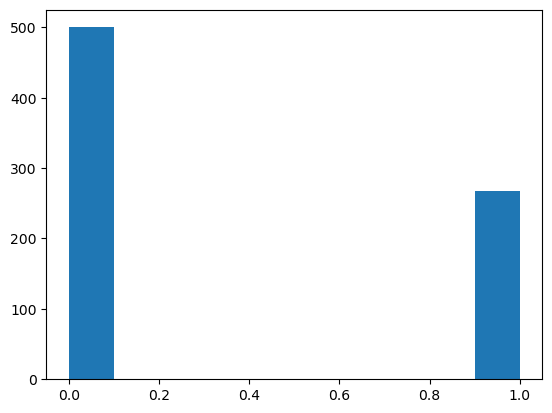

In [13]:
# Plotando a variável target
plt.hist(diabetes_df['Outcome'])

Existe um desbalanceamento entre as classes, e esta diferença pode prejudicar a qualidade do nosso modelo.

## Conjunto de treino e teste dataset

Certo, nós vamos dividir nosso dataset em conjuntos de treino e teste.

In [14]:
from sklearn.model_selection import train_test_split
#train, test = train_test_split( diabetes_df, test_size=0.2, random_state=4,stratify=churn_df['churn'])
train, test = train_test_split( diabetes_df, test_size=0.2, random_state=4)

Vamos normalizar os dados utilizando o z-score. Então precisamos calcular a média e o desvio padrão do conjunto de treino, antes de realizar a sobre-amostragem.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#separando o conjunto de entrada de treino
X_train = np.asarray(train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

#calculando a média e o desvio padrão do conjunto de treino
data_scaler = StandardScaler().fit(X_train)

Agora vamos realizar o oversampling.

## Over-sampling dos dados (sobre-amostragem)

Como o nosso dataset possuí poucos dados, realizaremos a sobre-amostragem da classe 1.

Diferente da técnica de sobreamostragem aleatória, a técnica do SMOTE cria dados sintéticos através de interpolação do erro de classificação, dos dados originais, via KNN (k-Nearest Neighbors). Mais detalhes em (N. V. Chawla, K. W. Bowyer, L. O.Hall, W. P. Kegelmeyer, “SMOTE: synthetic minority over-sampling technique,” Journal of artificial intelligence research, 16, 321-357, 2002.)

Criando os dados

In [16]:
# pip install -U --user imbalanced-learn

In [17]:
from imblearn.over_sampling import SMOTENC

smt=SMOTENC(sampling_strategy ='auto',categorical_features=[6,])
df_X_train_over, df_y_train_over = smt.fit_resample(train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']], train[['Outcome']])

In [18]:
# Contagem das classes
df_y_train_over.Outcome.value_counts()

0    398
1    398
Name: Outcome, dtype: int64

Unindo entrada e saída. Essa parte será utilizada mais tarde.

In [19]:
df_train_over = pd.concat([df_X_train_over, df_y_train_over], axis=1)
df_train_over.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,67,76,0,0,45.3,0.194,46,0
1,1,80,55,0,0,19.1,0.258,21,0
2,2,105,75,0,0,23.3,0.560,53,0
3,2,90,60,0,0,23.5,0.191,25,0
4,7,125,86,0,0,37.6,0.304,51,0


Agora vamos normalizar os conjuntos de treino e teste, utilizando a média e o desvio padrão calculado anteriormente.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_over = np.asarray(df_train_over[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])
X_test = np.asarray(test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

y_train_over = np.asarray(df_y_train_over['Outcome'])
y_test = np.asarray(test['Outcome'])

#aplicando o z-score nos conjuntos de treino e teste
data_scaler = StandardScaler().fit(X_train_over)
X_train_over = data_scaler.transform(X_train_over)
X_test = data_scaler.transform(X_test)

# Modelando (rede neural multicamadas com Scikit-learn)

Vamos construir nosso modelo utilizando o __MLP classifier__ do pacote Scikit-learn. 
Agora vamos treinar (fit) nosso modelo com o conjunto de treino:

In [21]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Criando parametros para o grid search

In [22]:
#testando duas camadas escondidas para diferentes configurações de neurônios
#camadas=((3,3),(4,4),(3,5))

In [23]:
#testando uma camada escondida para um range de 1 à 5 neurônios
camadas=(10,50,100)#range(1,50)

In [24]:
parametros={'hidden_layer_sizes':camadas,'learning_rate_init': (0.1,0.9,0.01,0.001),
            'activation' :['tanh','relu'],'solver':['sgd','adam'],'learning_rate':['adaptive','constant'],
           'early_stopping':[True],'batch_size':(10,),'n_iter_no_change':(10,),'alpha':(0.001,0.9) }
mlp = MLPClassifier()
#clf = GridSearchCV(mlp,param_grid = parametros,cv = 5,scoring= 'accuracy',verbose=True, n_jobs=-1,return_train_score=True)
clf = GridSearchCV(mlp,param_grid = parametros,cv = 5,scoring= 'f1',verbose=True, n_jobs=-1,return_train_score=True)
#clf = GridSearchCV(mlp,param_grid = parametros,cv = 5,scoring= 'recall',verbose=True, n_jobs=-1,return_train_score=True)
#clf = GridSearchCV(mlp,param_grid = parametros,cv = 5,scoring= 'precision',verbose=True, n_jobs=-1,return_train_score=True)

Treinando e encontrando os melhores parâmetros

In [25]:
best_clf=clf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


Visualizando todos treinos

In [27]:
df_param=pd.DataFrame(data=best_clf.cv_results_)

df_param.loc[df_param['mean_test_score']==df_param['mean_test_score'].max(),'mean_test_score':'std_test_score']
#df_param.loc[df_param['mean_test_score']==df_param['mean_test_score'].max()]

,mean_test_score,std_test_score
113,0.784218,0.019341


In [28]:
df_param.head(113)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_batch_size,param_early_stopping,param_hidden_layer_sizes,param_learning_rate,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.891355,0.108723,0.002084,1.709523e-03,tanh,0.001,10,True,10,adaptive,...,0.779099,0.031846,5,0.861685,0.904836,0.836524,0.862866,0.795252,0.852233,0.035953
1,0.321055,0.056379,0.001200,4.000908e-04,tanh,0.001,10,True,10,adaptive,...,0.728370,0.074687,135,0.823899,0.757216,0.806697,0.807750,0.793985,0.797909,0.022454
2,2.003302,0.131040,0.001203,4.023571e-04,tanh,0.001,10,True,10,adaptive,...,0.764943,0.040646,24,0.760274,0.822630,0.799401,0.771300,0.808023,0.792326,0.023170
3,0.350531,0.095536,0.001000,4.672031e-07,tanh,0.001,10,True,10,adaptive,...,0.737651,0.035606,106,0.737008,0.753247,0.759259,0.695958,0.682848,0.725664,0.030769
4,1.528204,0.137508,0.001202,4.054549e-04,tanh,0.001,10,True,10,adaptive,...,0.759206,0.027421,42,0.774803,0.810893,0.783172,0.785489,0.796325,0.790136,0.012445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.373165,0.118388,0.002200,1.939310e-03,relu,0.001,10,True,10,constant,...,0.752456,0.033858,57,0.776911,0.796353,0.798732,0.718584,0.818591,0.781834,0.034270
109,0.377302,0.094692,0.001600,8.001692e-04,relu,0.001,10,True,10,constant,...,0.756876,0.026865,46,0.815038,0.803125,0.819242,0.767372,0.765273,0.794010,0.023226
110,0.508357,0.048469,0.001399,4.893386e-04,relu,0.001,10,True,10,constant,...,0.748993,0.018941,66,0.770701,0.729858,0.762053,0.745342,0.721582,0.745907,0.018574
111,0.509830,0.148418,0.001400,4.904079e-04,relu,0.001,10,True,10,constant,...,0.774536,0.028073,8,0.763473,0.779503,0.761760,0.752791,0.782209,0.767947,0.011180


Visualizando os melhores parâmetros

In [29]:
print(best_clf.best_params_ )

{'activation': 'relu', 'alpha': 0.001, 'batch_size': 10, 'early_stopping': True, 'hidden_layer_sizes': 50, 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'n_iter_no_change': 10, 'solver': 'adam'}


Agora podemos realizar a previsão com o conjunto de teste:

In [30]:
yhat = clf.predict(X_test)
yhat

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

__predict_proba__  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [31]:
yhat_prob = clf.predict_proba(X_test)

In [33]:
#yhat_prob = mlp.predict_proba(X_train_over)
yhat_prob

array([[2.88337294e-01, 7.11662706e-01],
       [5.64501301e-01, 4.35498699e-01],
       [9.84264464e-01, 1.57355360e-02],
       [3.19333813e-01, 6.80666187e-01],
       [7.69275800e-01, 2.30724200e-01],
       [2.06497492e-01, 7.93502508e-01],
       [1.35825840e-01, 8.64174160e-01],
       [2.42892602e-01, 7.57107398e-01],
       [6.82383084e-03, 9.93176169e-01],
       [4.26807960e-01, 5.73192040e-01],
       [2.30831051e-01, 7.69168949e-01],
       [9.80558466e-01, 1.94415341e-02],
       [2.73267293e-01, 7.26732707e-01],
       [9.72042756e-01, 2.79572442e-02],
       [6.67989649e-01, 3.32010351e-01],
       [1.92422236e-01, 8.07577764e-01],
       [4.66406252e-02, 9.53359375e-01],
       [1.42292712e-03, 9.98577073e-01],
       [9.97762051e-01, 2.23794887e-03],
       [9.47401390e-01, 5.25986103e-02],
       [9.49267554e-01, 5.07324463e-02],
       [7.24598701e-02, 9.27540130e-01],
       [2.17586172e-01, 7.82413828e-01],
       [3.62568711e-02, 9.63743129e-01],
       [6.463893

## Avaliação

### matriz de confusão
Outra maneira de analisar a precisão do classificador é analisar a __matriz de confusão__.

In [34]:
confusao = confusion_matrix(y_test, yhat)

In [35]:
print(confusao)

[[58 44]
 [12 40]]


In [36]:
confusao_hat = pd.DataFrame(data=confusao, index=('Outcome=0','Outcome=1'),columns=('Outcome=0','Outcome=1'))

In [37]:
confusao_hat.head()

,Outcome=0,Outcome=1
Outcome=0,58,44
Outcome=1,12,40


Text(0.5, 23.52222222222222, 'Predicted label')

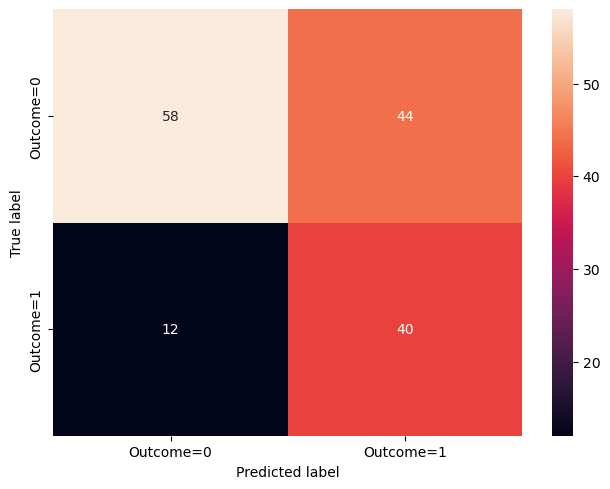

In [38]:
sns.heatmap(confusao_hat,annot=True)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [40]:
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.83      0.57      0.67       102
           1       0.48      0.77      0.59        52

    accuracy                           0.64       154
   macro avg       0.65      0.67      0.63       154
weighted avg       0.71      0.64      0.65       154



Com base na contagem de cada seção, podemos calcular a precisão e o recall de cada rótulo:


- __Precision__ é uma medida da precisão, desde que um rótulo de classe tenha sido previsto. É definido por: precision = TP / (TP + FP)

- __Recall__ é verdadeira taxa positiva. É definido como: Rechamada = TP / (TP + FN)

    
Assim, podemos calcular a precisão e o recall de cada classe.

__F1 score:__
Agora, estamos em posição de calcular o F1 score para cada classe com base na precisão e recall dessa classe.

O F1 score é a média harmônica da precisão e recall, onde um F1 score atinge seu melhor valor em 1 (precisão e recall perfeitas) e pior em 0. É uma boa maneira de mostrar que um classificador tem um bom valor para ambos recall e precisão.


## Curva ROC e AUC 

A curva ROC pode ser traçada utilizando a função roc_curve(), da biblioteca scikit-learn. Para utilizar a função precisamos dos valores de probabilidade calculados na predição da classe 1. A função retorna as taxas de falsos positivos para cada limiar, as taxas verdadeiros positivos para cada limiar e os limiares.

In [41]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#separando a probabilidade para a classe 1
yhat_prob_ = yhat_prob[:, 1]

#calculando a curva
#ns_fpr, ns_tpr, _ = roc_curve(y_train_over, yhat_prob)
ns_fpr, ns_tpr, _ = roc_curve(y_test, yhat_prob_)
#ns_tpr,ns_fpr, _ = roc_curve(y_test, yhat_prob_)

Plotando a curva

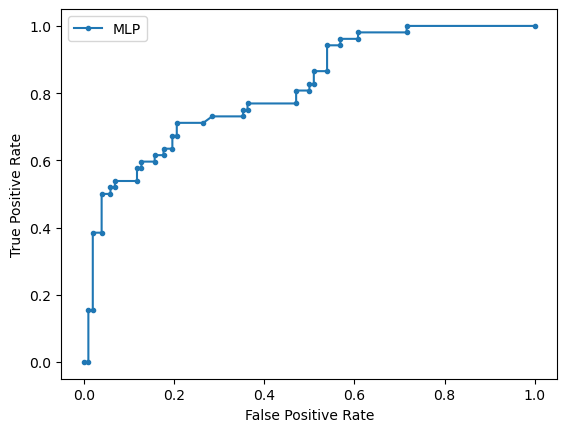

In [56]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, marker='.', label='MLP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Calculando o AUC

In [57]:
lr_auc = roc_auc_score(y_test, yhat_prob_)
print('ROC AUC=%.3f' % (lr_auc))

ROC AUC=0.814


# Avaliando a consistência do modelo.
Utilizando a validação cruzada e os melhores parâmetros.
Um modelo robusto deve apresentar baixo variância (será analisado o desvio padrão) e baixo erro entre os treinos.

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# {'activation': 'relu', 'alpha': 0.9, 'batch_size': 10, 'early_stopping': True, 'hidden_layer_sizes': 50,
# 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'n_iter_no_change': 10, 'solver': 'sgd'}

mlp_cross = MLPClassifier(activation='relu', alpha=0.9, early_stopping=True,
              hidden_layer_sizes=50, learning_rate='adaptive',
              learning_rate_init=0.1, max_iter=1000, solver='sgd', verbose=False,batch_size=10,n_iter_no_change= 10)

In [60]:
data_cross= pd.concat([df_train_over, test], axis=0)
data_cross.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,67,76,0,0,45.3,0.194,46,0
1,1,80,55,0,0,19.1,0.258,21,0
2,2,105,75,0,0,23.3,0.560,53,0
3,2,90,60,0,0,23.5,0.191,25,0
4,7,125,86,0,0,37.6,0.304,51,0


In [61]:
X_cross = np.asarray(data_cross[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])
y_cross = np.asarray(data_cross['Outcome'])

### O pipeline automatiza o processo de normalização dos dados para cada conjunto de treino e teste. Isto é, coloca em sequencia os passos: 

1- Normalização

2-Treino do modelo

In [62]:
clf = make_pipeline(preprocessing.StandardScaler(),mlp_cross) 
results_clf = cross_val_score(clf, X_cross, y_cross,scoring='f1', cv=3)

print("f1-score: %.2f%%" % (results_clf.mean()*100.0)) 
print("Std: %.2f" % (results_clf.std()*100.0))

f1-score: 67.92%
Std: 1.27


In [63]:
results_clf

array([0.66141732, 0.69014085, 0.68613139])